#### Logisitc Regression, Handling Imbalanced Data

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic Regression model on the training data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import statsmodels.api as sm
import math
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer

#importing libraries for _Classification_Logistic_Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('DATA_Customer-Churn.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
def clean_data(df):
    df.columns=[i.lower().replace(' ', '_') for i in df.columns]
    #df=df.drop(columns=[''])
    df=df.dropna()
    return df

In [4]:
df=clean_data(df)
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
#a= {'No': 0, 'Yes': 1}
#df['churn']=df['churn'].map(a)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')

In [8]:
mean_totalcharges = np.mean(df.totalcharges)
df.totalcharges = df.totalcharges.fillna(mean_totalcharges)

In [9]:
catCols = [col
   for col in df.columns
   if df[col].dtype == "O"
]

In [10]:
catCols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'churn']

In [11]:
df=df.replace('No internet service', 'No')

#### Create dummy variables

In [12]:
#cat_vars=['gender', 'partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
 #        'techsupport', 'streamingtv', 'streamingmovies']
#for var in cat_vars:
 #   cat_list='var'+'_'+var
  #  cat_list = pd.get_dummies(df[var], prefix=var)
    #df1=df.join(cat_list)
    #df=df1
#cat_vars=['gender', 'partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
  #       'techsupport', 'streamingtv', 'streamingmovies']
#df_vars=df.columns.values.tolist()
#to_keep=[i for i in df_vars if i not in cat_vars]

In [13]:
#df_vars

In [14]:
for i in df.columns:
    print(f'{[i]}: {df[i].unique()}')

['gender']: ['Female' 'Male']
['seniorcitizen']: [0 1]
['partner']: ['Yes' 'No']
['dependents']: ['No' 'Yes']
['tenure']: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['phoneservice']: ['No' 'Yes']
['onlinesecurity']: ['No' 'Yes']
['onlinebackup']: ['Yes' 'No']
['deviceprotection']: ['No' 'Yes']
['techsupport']: ['No' 'Yes']
['streamingtv']: ['No' 'Yes']
['streamingmovies']: ['No' 'Yes']
['contract']: ['Month-to-month' 'One year' 'Two year']
['monthlycharges']: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['totalcharges']: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['churn']: ['No' 'Yes']


In [15]:
df.contract = df['contract'].replace(['Month-to-month', 'One year', 'Two year'], [1,12,24]).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   int32  
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(

In [16]:
df.to_excel('df.xlsx')

In [17]:
X=df._get_numeric_data()
X_scaled=StandardScaler().fit_transform(X)
y = df.churn

In [18]:
df.groupby('churn').mean()

,seniorcitizen,tenure,contract,monthlycharges,totalcharges
churn,,,,,
No,0.128721,37.569965,11.100116,61.265124,2554.765772
Yes,0.254682,17.979133,2.567683,74.441332,1531.796094


Performance_LogisticRegression-imbalance


,Error_metric,Train,Test
0,Accuracy,0.794817,0.798439
1,Precision,0.654265,0.659498
2,Recall,0.481952,0.493298


Confusion matrix for the train set
[[3757  381]
 [ 775  721]]


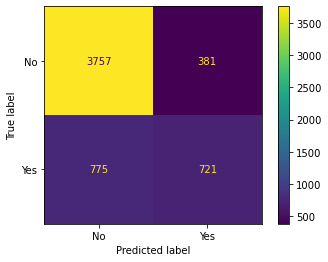



Confusion matrix for the test set
[[941  95]
 [189 184]]


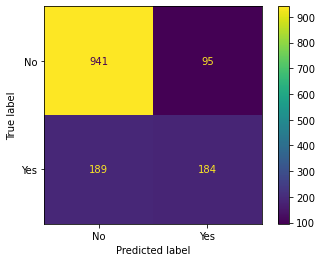

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                  precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
print('Performance_LogisticRegression-imbalance')
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Decision trees

Performance_decision_tree-imbalance


,Error_metric,Train,Test
0,Accuracy,0.791090,0.789212
1,Precision,0.646734,0.635714
2,Recall,0.469920,0.477212


Confusion matrix for the train set
[[3754  793]
 [ 384  703]]


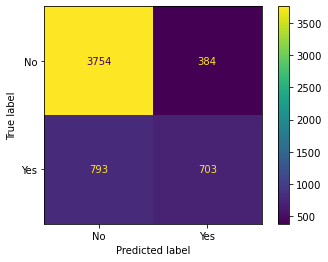



Confusion matrix for the test set
[[934 195]
 [102 178]]


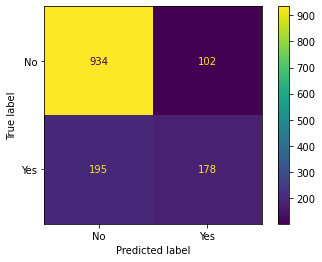

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf = 30, max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})
print('Performance_decision_tree-imbalance')
display(performance_dt)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

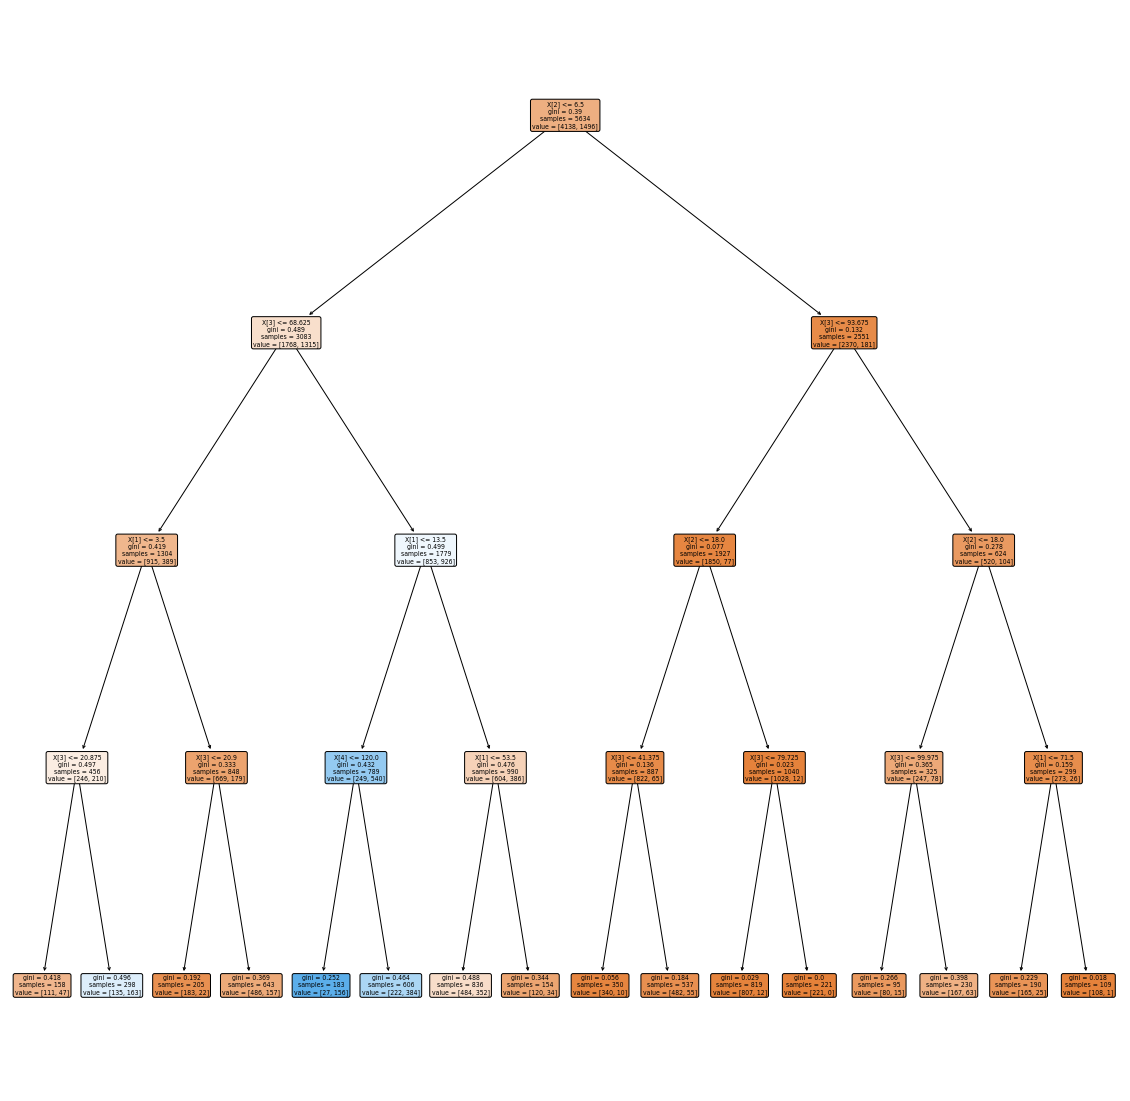

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

#### Random forest Classifier

In [22]:
y = df['churn']
X = df.drop(['churn'], axis = 1)

In [23]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_score= clf.score(X_test, y_test)
clf_score

0.752306600425834

In [24]:
X

,seniorcitizen,tenure,contract,monthlycharges,totalcharges,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,0,1,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0,34,12,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,2,1,53.85,108.15,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,45,12,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0,2,1,70.70,151.65,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,12,84.80,1990.50,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7039,0,72,12,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
7040,0,11,1,29.60,346.45,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7041,1,4,1,74.40,306.60,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(cross_val_scores)
print(f'Mean cross value scores is: {np.mean(cross_val_scores)}')

[0.75886525 0.7535461  0.7570922  0.7393617  0.74067496 0.74422735
 0.74777975 0.74422735 0.74955595 0.74955595]
Mean cross value scores is: 0.7484886562614161


#### Applying K-fold cross validation on the model.

#### cross validation on Logistic regression model

In [26]:
scores=cross_val_score(log, X_train, y_train, cv=5)
scores

array([0.7985803 , 0.79591837, 0.79236912, 0.77817214, 0.80994671])

In [27]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


#### cross validation on decision tree model

In [28]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.79591837, 0.79148181, 0.79325643, 0.77905945, 0.80284192])

In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


In [30]:
y_pred = pd.DataFrame(cross_val_predict(log, X_test, y_test, cv=5))
y_pred.value_counts()

No     1131
Yes     278
dtype: int64

#### Models Comparision

In [31]:
#a= {'No': 0, 'Yes': 1}
#df['churn']=df['churn'].map(a)

In [32]:
#X=df._get_numeric_data()
#X

In [33]:
#X_scaled=StandardScaler().fit_transform(X)
#y = df.churn

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
#knn = KNeighborsRegressor()
#scores=cross_val_score(knn, X_train, y_train, cv=5)
#scores

In [36]:
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [37]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

model3 = KNeighborsClassifier(n_neighbors=5)


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': nan, 'Linear Regression': nan, 'KNN': 0.7674757189826538}


#### Handling imbalances

In [38]:
count_no_churn = len(df[df['churn']=='No'])
count_churn = len(df[df['churn']=='Yes'])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn= count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

percentage of no churn is 73.4630129206304
percentage of churn 26.536987079369588


### Downsampling

In [39]:
category_ds0 = df[df['churn'] == 'No']
category_ds1 = df[df['churn'] == 'Yes']
category_ds1.shape

(1869, 16)

In [40]:
category_ds0.shape

(5174, 16)

In [41]:
category_ds0_down = category_ds0.sample(len(category_ds1,))

In [42]:
category_ds0_down = category_ds0.sample(len(category_ds1,))
df_ds = pd.concat([category_ds0_down, category_ds1], axis=0)
#shuffling the data
df_ds = df_ds.sample(frac=1)
df_ds['churn'].value_counts()

No     1869
Yes    1869
Name: churn, dtype: int64

Performance of LogisticRegression with Downsampling


,Error_metric,Train,Test
0,Accuracy,0.752508,0.743316
1,Precision,0.731990,0.712230
2,Recall,0.799333,0.804878


Confusion matrix for the train set
[[1051  439]
 [ 301 1199]]


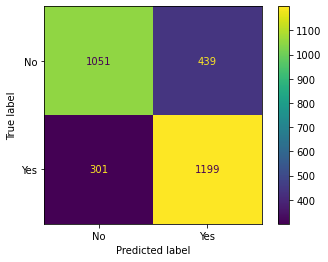



Confusion matrix for the test set
[[259 120]
 [ 72 297]]


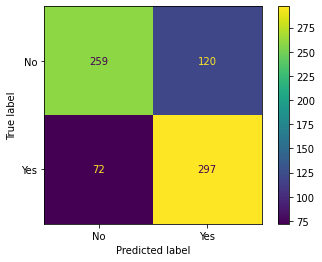

In [43]:
# LogisticRegression with Downsampling

X=df_ds._get_numeric_data()
X_scaled=StandardScaler().fit_transform(X)
y = df_ds.churn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log_downsampled = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                  precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
print('Performance of LogisticRegression with Downsampling')
display(performance_log_downsampled)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Decision tree with downscaling

performance of decision treewith Downsampling


,Error_metric,Train,Test
0,Accuracy,0.759532,0.763369
1,Precision,0.751125,0.750000
2,Recall,0.778667,0.780488


Confusion matrix for the train set
[[1103  332]
 [ 387 1168]]


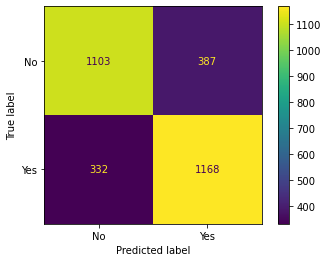



Confusion matrix for the test set
[[283  81]
 [ 96 288]]


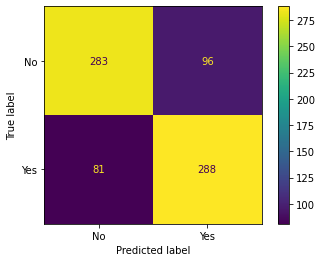

In [44]:
# Decision tree with Downsampling

X=df_ds._get_numeric_data()
X_scaled=StandardScaler().fit_transform(X)
y = df_ds.churn

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf = 30, max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_dt_downsampled = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})
print('performance of decision treewith Downsampling')
display(performance_dt_downsampled)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()



In [45]:
X_train.columns

Index(['seniorcitizen', 'tenure', 'contract', 'monthlycharges',
       'totalcharges'],
      dtype='object')

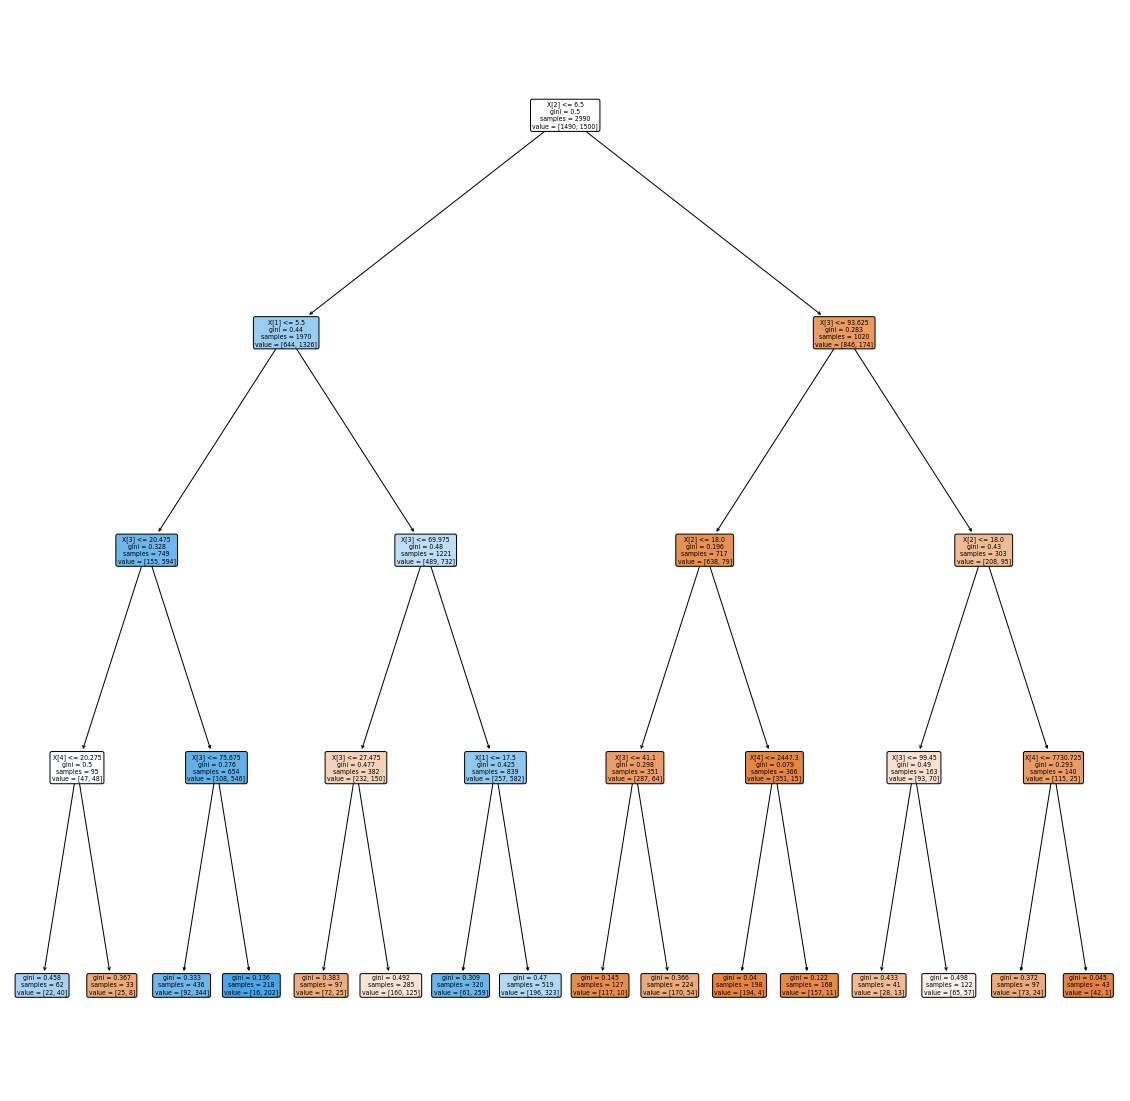

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show()

In [47]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

#model3 = KNeighborsRegressor()


model_pipeline = [model1, model2]
model_names = ['Regression Tree', 'Linear Regression']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': nan, 'Linear Regression': nan}


#### Randomforest with downsampling

In [48]:
category_ds0 = df[df['churn'] == 'No']
category_ds1 = df[df['churn'] == 'Yes']
category_ds0_down = category_ds0.sample(len(category_ds1,))
df_ds = pd.concat([category_ds0_down, category_ds1], axis=0)
#shuffling the data
df_ds = df_ds.sample(frac=1)
df_ds = df_ds.reset_index(drop=True)
df_ds['churn'].value_counts()


Yes    1869
No     1869
Name: churn, dtype: int64

In [49]:
y = df_ds['churn']
X = df_ds.drop(['churn'], axis = 1)
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_ds_score = clf.score(X_test, y_test)
print(f'The Random forest classification with downsampling : {clf_ds_score}')

The Random forest classification with downsampling : 0.7299465240641712


In [50]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(cross_val_scores)
print(f'Mean cross value scores of Random forest classification with downsampling is: {np.mean(cross_val_scores)}')

[0.75250836 0.75250836 0.74916388 0.74916388 0.72575251 0.75250836
 0.71571906 0.78929766 0.76254181 0.78595318]
Mean cross value scores of Random forest classification with downsampling is: 0.7535117056856188


#### Upsampling Method 1

In [51]:
us_category_0 = df[df['churn'] == 'No']
us_category_1 = df[df['churn'] == 'Yes']
us_category_1_up = us_category_1.sample(len(us_category_0), replace=True)
print(us_category_1_up.shape, us_category_0.shape)
us_category_1_up

(5174, 16) (5174, 16)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
3098,Male,1,Yes,No,30,Yes,No,Yes,Yes,No,No,No,1,79.65,2365.15,Yes
6009,Male,1,Yes,No,53,Yes,No,Yes,Yes,No,Yes,Yes,1,103.85,5485.50,Yes
6622,Male,0,No,No,2,Yes,No,No,No,No,No,Yes,1,62.05,118.30,Yes
4978,Female,0,No,No,1,Yes,No,No,No,No,No,No,1,44.10,44.10,Yes
893,Female,0,No,No,1,No,No,No,No,No,No,No,1,24.60,24.60,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Male,0,No,No,1,Yes,No,No,Yes,No,No,No,1,54.35,54.35,Yes
5116,Male,0,No,No,1,Yes,No,No,No,No,No,No,1,70.40,70.40,Yes
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,1,44.20,403.35,Yes
6864,Female,1,No,No,3,No,No,No,No,No,No,No,1,25.30,77.75,Yes


In [52]:
df_us = pd.concat([us_category_0, us_category_1_up], axis=0)
#shuffling the data
df_us = df_us.sample(frac=1)
df_us['churn'].value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [53]:
df_us['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
us_category_1_up.shape

(5174, 16)

(8278, 5) (8278,)
Performance of LogisticRegression with upsampling


,Error_metric,Train,Test
0,Accuracy,0.756584,0.764734
1,Precision,0.739276,0.732456
2,Recall,0.796007,0.821042


Confusion matrix for the train set
[[2954 1167]
 [ 848 3309]]


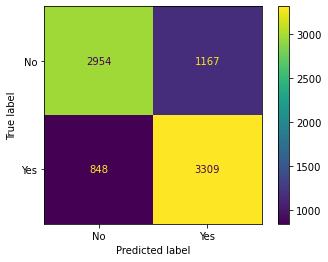



Confusion matrix for the test set
[[748 305]
 [182 835]]


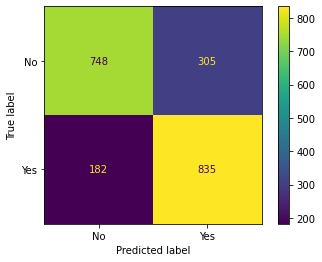

In [55]:
# LogisticRegression with Upsampling 1

X=df_us._get_numeric_data()
X_scaled=StandardScaler().fit_transform(X)
y = df_us.churn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

print(X_train.shape, y_train.shape)

y_train

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log_upsampled = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                  precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
print('Performance of LogisticRegression with upsampling')
display(performance_log_upsampled)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

Performance of decision tree with upsampling


,Error_metric,Train,Test
0,Accuracy,0.751510,0.766667
1,Precision,0.759387,0.762795
2,Recall,0.739476,0.762045


Confusion matrix for the train set
[[3147 1083]
 [ 974 3074]]


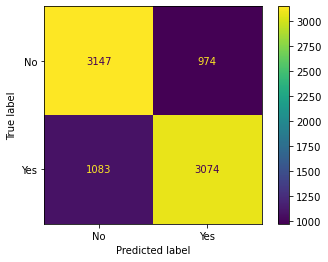



Confusion matrix for the test set
[[812 242]
 [241 775]]


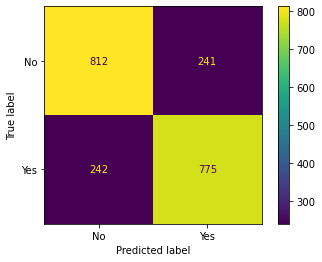

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


X=df_us._get_numeric_data()
X_scaled=StandardScaler().fit_transform(X)
y = df_us.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf = 30, max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_dt_upsampled = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})
print('Performance of decision tree with upsampling')
display(performance_dt_upsampled)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()



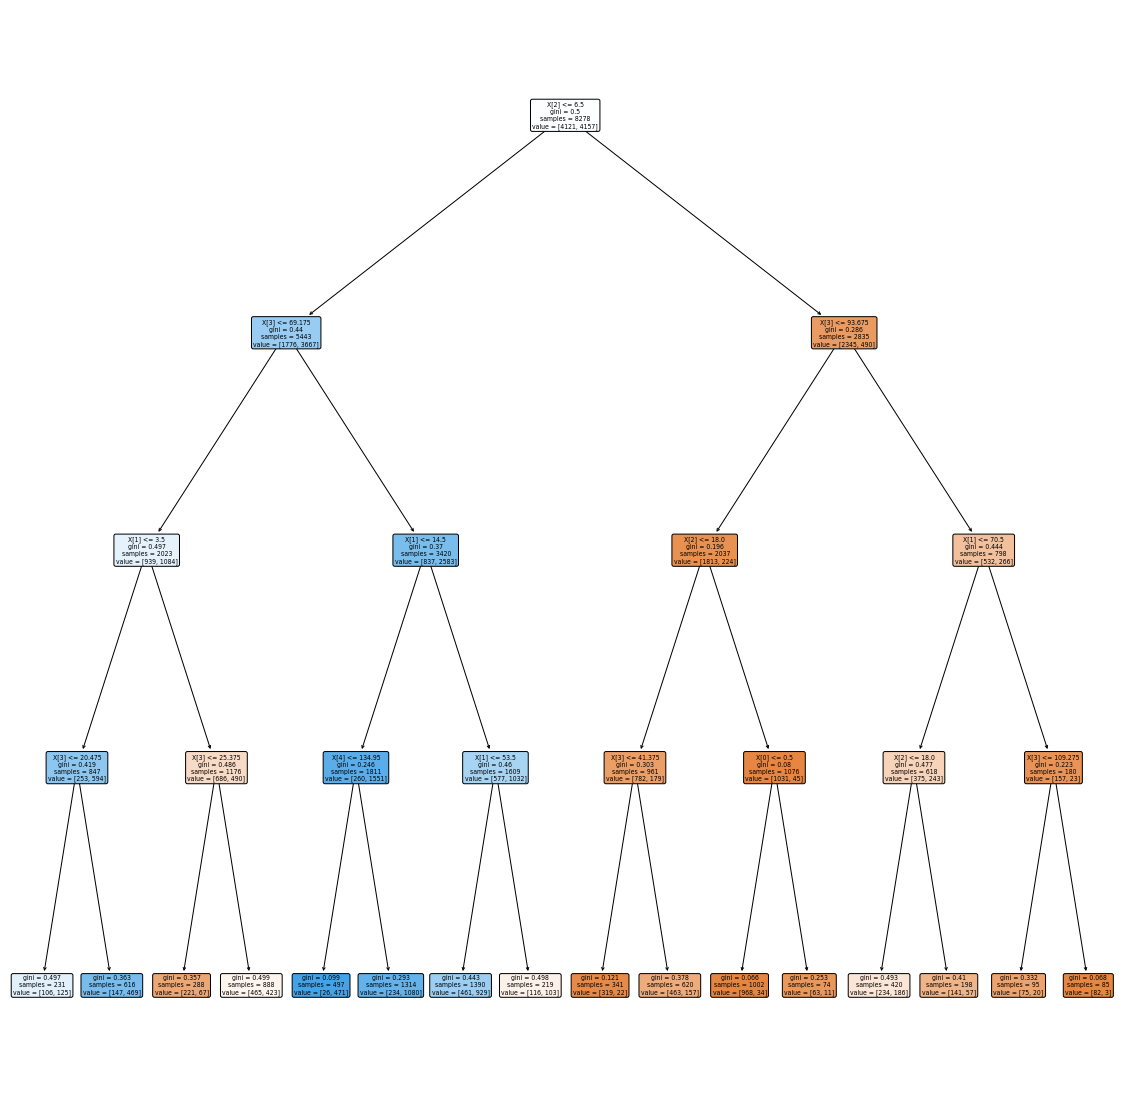

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show()

In [58]:
df_us = pd.concat([us_category_0, us_category_1_up], axis=0)
#shuffling the data
df_us = df_us.sample(frac=1)
df_us = df_us.reset_index(drop=True)
df_us['churn'].value_counts()

y = df_us['churn']
X = df_us.drop(['churn'], axis = 1)
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_us_score = clf.score(X_test, y_test)
print(f'The Random forest classification with upsampling : {clf_us_score}')

The Random forest classification with upsampling : 0.7444444444444445


In [59]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(cross_val_scores)
print(f'Mean cross value scores of Random forest classification with upsampling is: {np.mean(cross_val_scores)}')

[0.73913043 0.74396135 0.74275362 0.73309179 0.75120773 0.74758454
 0.75362319 0.76449275 0.72914148 0.7496977 ]
Mean cross value scores of Random forest classification with upsampling is: 0.7454684588378926


#### Upsampling using SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [61]:
#X=df._get_numeric_data()
#X

In [62]:
#y = df['churn']

In [63]:
#y.value_counts()

In [64]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Yes    5174
No     5174
Name: churn, dtype: int64

(8278, 15) (8278,)
Performance of LogisticRegression with SMOTE


,Error_metric,Train,Test
0,Accuracy,0.772288,0.757971
1,Precision,0.757611,0.755535
2,Recall,0.797524,0.776303


Confusion matrix for the train set
[[3108 1051]
 [ 834 3285]]


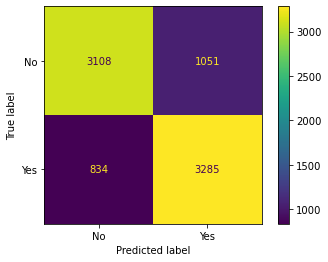



Confusion matrix for the test set
[[750 265]
 [236 819]]


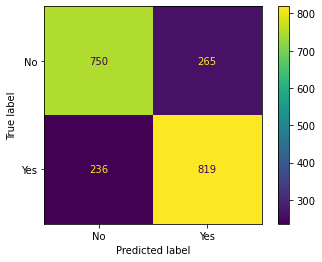

In [65]:
# LogisticRegression with Upsampling using SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

print(X_train.shape, y_train.shape)

y_train

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log_smote = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                  precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
print('Performance of LogisticRegression with SMOTE')
display(performance_log_smote)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

Performance of decision tree with SMOTE


,Error_metric,Train,Test
0,Accuracy,0.757429,0.739614
1,Precision,0.769329,0.768191
2,Recall,0.731974,0.700474


Confusion matrix for the train set
[[3255 1104]
 [ 904 3015]]


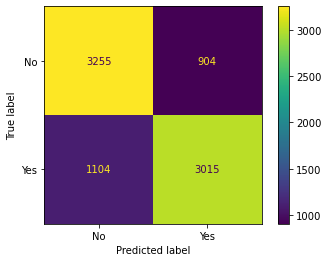



Confusion matrix for the test set
[[792 316]
 [223 739]]


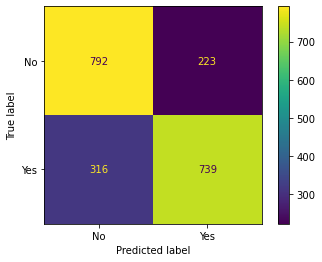

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf = 30, max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_dt_smote = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})
print('Performance of decision tree with SMOTE')
display(performance_dt_smote)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()



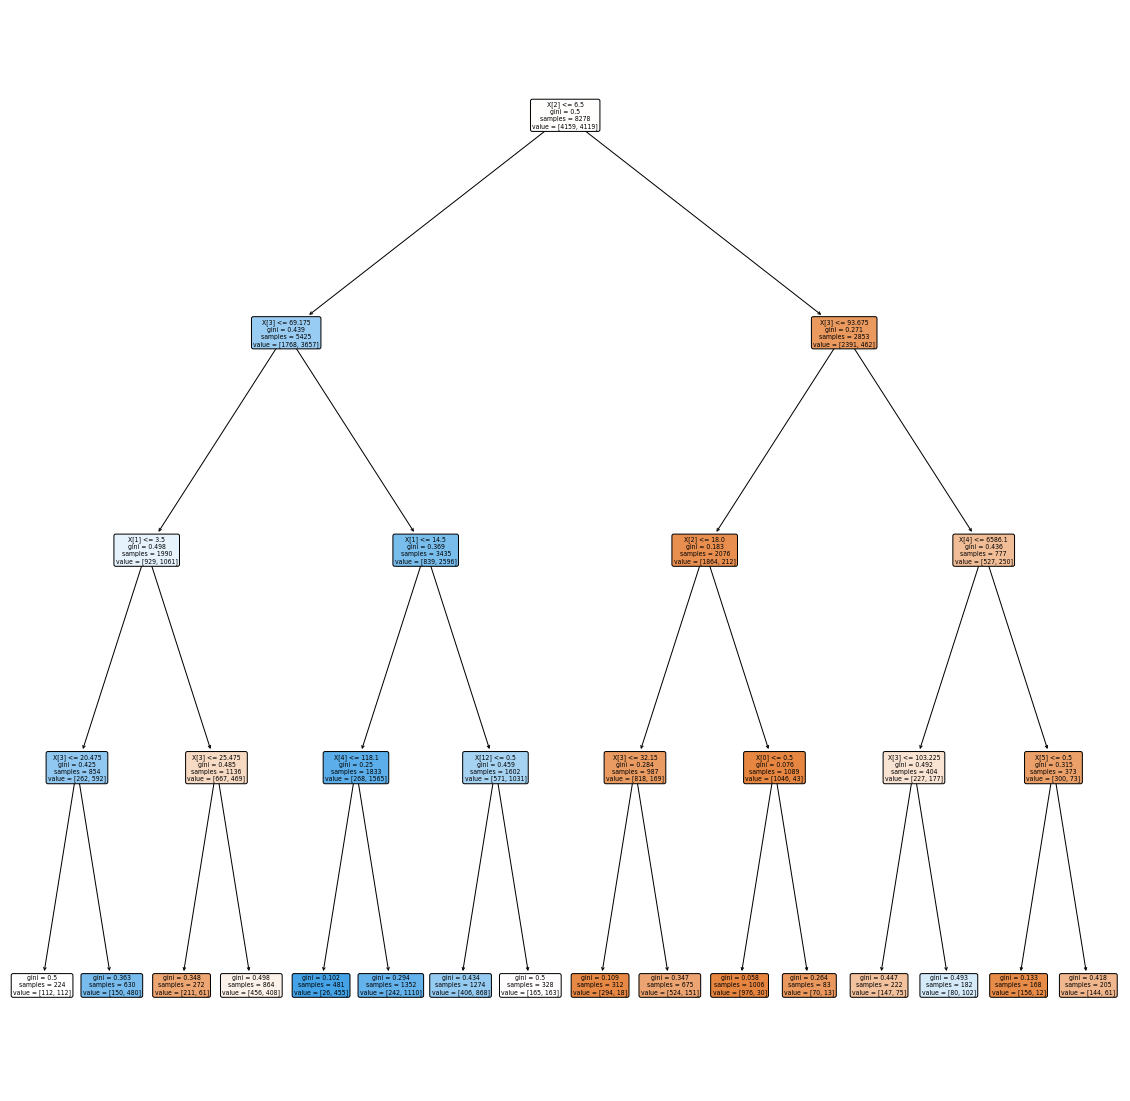

In [67]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show()

In [68]:
y = df['churn']
X = df.drop(['churn'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_smote_score = clf.score(X_test, y_test)
print(f'The Random forest classification with smote : {clf_smote_score}')

The Random forest classification with smote : 0.7772946859903381


In [69]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(cross_val_scores)
print(f'Mean cross value scores of Random forest classification with smote is: {np.mean(cross_val_scores)}')

[0.78623188 0.75845411 0.78985507 0.78140097 0.7910628  0.7705314
 0.78019324 0.79468599 0.77025393 0.79564692]
Mean cross value scores of Random forest classification with smote is: 0.7818316305370089


#### Downsampling using Tomeklinks

In [70]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

No     4637
Yes    1869
Name: churn, dtype: int64

(5204, 15) (5204,)
Performance of LogisticRegression with Tomeklinks


,Error_metric,Train,Test
0,Accuracy,0.816679,0.817972
1,Precision,0.706015,0.701863
2,Recall,0.625166,0.615804


Confusion matrix for the train set
[[3311  391]
 [ 563  939]]


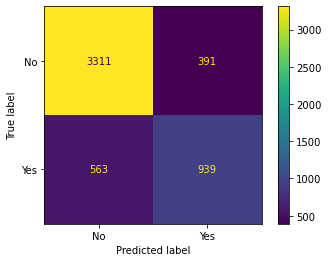



Confusion matrix for the test set
[[839  96]
 [141 226]]


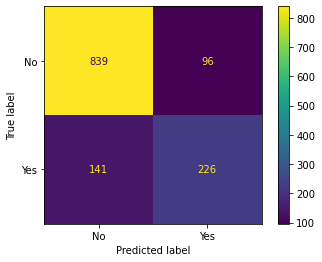

In [71]:
# LogisticRegression with Downsampling using Tomeklinks

X=X_tl
X_scaled=StandardScaler().fit_transform(X)
y = y_tl

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

print(X_train.shape, y_train.shape)

y_train

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log_Tomeklinks = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                  precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
print('Performance of LogisticRegression with Tomeklinks')
display(performance_log_Tomeklinks)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### decision tree

Performance of decision tree with Tomeklinks


,Error_metric,Train,Test
0,Accuracy,0.802267,0.791091
1,Precision,0.644825,0.625330
2,Recall,0.701065,0.645777


Confusion matrix for the train set
[[3122  449]
 [ 580 1053]]


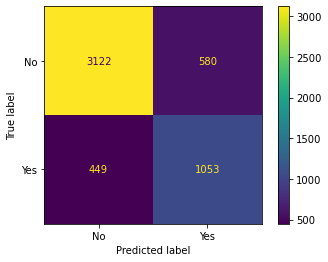



Confusion matrix for the test set
[[793 130]
 [142 237]]


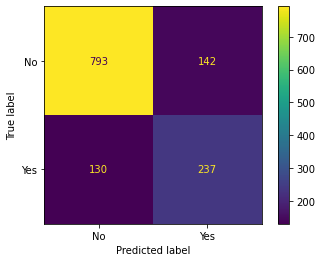

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


X=X_tl
X_scaled=StandardScaler().fit_transform(X)
y = y_tl


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf = 30, max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_dt_Tomeklinks = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})
print('Performance of decision tree with Tomeklinks')
display(performance_dt_Tomeklinks)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()



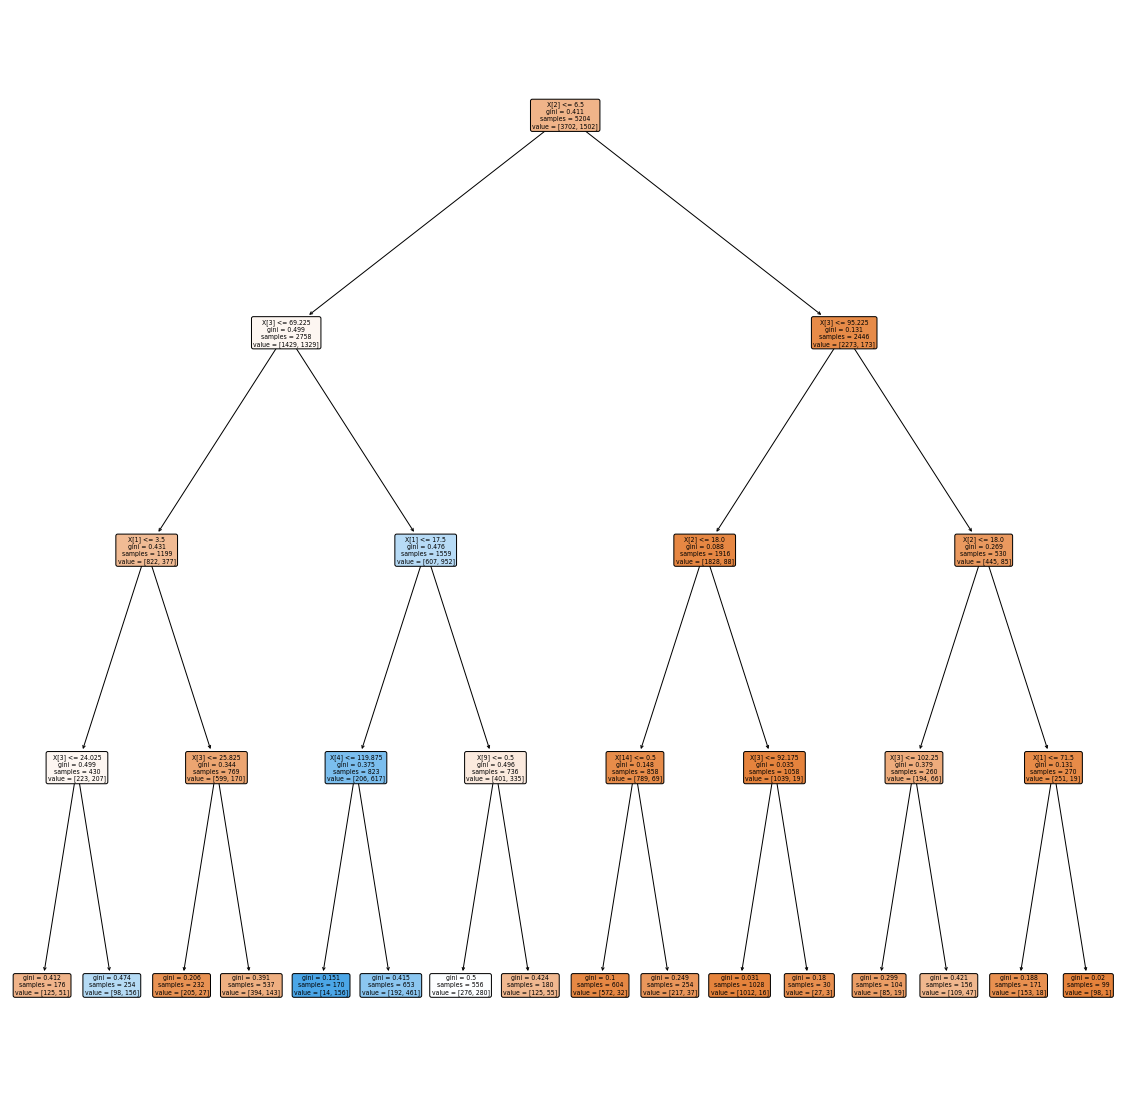

In [73]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show()

#### Random forest Classifier

In [74]:
y = df['churn']
X = df.drop(['churn'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_tomeklinks_score = clf.score(X_test, y_test)
print(f'The Random forest classification with tomeklinks : {clf_tomeklinks_score}')

The Random forest classification with tomeklinks : 0.7880184331797235


In [75]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(cross_val_scores)
print(f'Mean cross value scores of Random forest classification with smote is: {np.mean(cross_val_scores)}')

[0.77927063 0.77159309 0.75239923 0.77159309 0.75       0.76538462
 0.76730769 0.76538462 0.75961538 0.75192308]
Mean cross value scores of Random forest classification with smote is: 0.7634471430680645


In [76]:
print('Performance_LogisticRegression-imbalance')
print(performance_log)
print('Performance_decision_tree-imbalance')
print(performance_dt)
print('Performance of LogisticRegression with Downsampling')
print(performance_log_downsampled)
print('performance of decision treewith Downsampling')
print(performance_dt_downsampled)
print('Performance of LogisticRegression with upsampling')
print(performance_log_upsampled)
print('Performance of decision tree with upsampling')
print(performance_dt_upsampled)
print('Performance of LogisticRegression with SMOTE')
print(performance_log_smote)
print('Performance of decision tree with SMOTE')
print(performance_dt_smote)
print('Performance of LogisticRegression with Tomeklinks')
print(performance_log_Tomeklinks)
print('Performance of decision tree with Tomeklinks')
print(performance_dt_Tomeklinks)

Performance_LogisticRegression-imbalance
  Error_metric     Train      Test
0     Accuracy  0.794817  0.798439
1    Precision  0.654265  0.659498
2       Recall  0.481952  0.493298
Performance_decision_tree-imbalance
  Error_metric     Train      Test
0     Accuracy  0.791090  0.789212
1    Precision  0.646734  0.635714
2       Recall  0.469920  0.477212
Performance of LogisticRegression with Downsampling
  Error_metric     Train      Test
0     Accuracy  0.752508  0.743316
1    Precision  0.731990  0.712230
2       Recall  0.799333  0.804878
performance of decision treewith Downsampling
  Error_metric     Train      Test
0     Accuracy  0.759532  0.763369
1    Precision  0.751125  0.750000
2       Recall  0.778667  0.780488
Performance of LogisticRegression with upsampling
  Error_metric     Train      Test
0     Accuracy  0.756584  0.764734
1    Precision  0.739276  0.732456
2       Recall  0.796007  0.821042
Performance of decision tree with upsampling
  Error_metric     Train      

In [77]:
performance_log['model']= 'log_regression'
performance_log['balanced?'] = 'imbalance'
performance_dt['model']= 'decision_tree'
performance_dt['balanced?'] = 'imbalance'
performance_log_downsampled['model']= 'log_regression'
performance_log_downsampled['balanced?'] = 'downsampled'
performance_dt_downsampled['model']=  'decision_tree'
performance_dt_downsampled['balanced?'] = 'downsampled'
performance_log_upsampled['model']= 'log_regression'
performance_log_upsampled['balanced?'] = 'upsampled'
performance_dt_upsampled['model']=  'decision_tree'
performance_dt_upsampled['balanced?'] = 'upsampled'
performance_log_smote['model']= 'log_regression'
performance_log_smote['balanced?'] = 'smote'
performance_dt_smote['model']=  'decision_tree'
performance_dt_smote['balanced?'] = 'smote'
performance_log_Tomeklinks['model']= 'log_regression'
performance_log_Tomeklinks['balanced?'] = 'tomeklinks'
performance_dt_Tomeklinks['model']=  'decision_tree'
performance_dt_Tomeklinks['balanced?'] = 'tomeklinks'
#clf_score
#clf_ds_score
#clf_us_score
#clf_smote_score
#clf_tomeklinks_score


In [78]:
overview = pd.concat([performance_log,performance_dt,performance_log_downsampled,performance_dt_downsampled, performance_log_upsampled, performance_dt_upsampled, performance_log_smote, performance_dt_smote, performance_log_Tomeklinks, performance_dt_Tomeklinks], axis=0)

In [79]:
overview

,Error_metric,Train,Test,model,balanced?
0,Accuracy,0.794817,0.798439,log_regression,imbalance
1,Precision,0.654265,0.659498,log_regression,imbalance
2,Recall,0.481952,0.493298,log_regression,imbalance
0,Accuracy,0.791090,0.789212,decision_tree,imbalance
1,Precision,0.646734,0.635714,decision_tree,imbalance
2,Recall,0.469920,0.477212,decision_tree,imbalance
0,Accuracy,0.752508,0.743316,log_regression,downsampled
1,Precision,0.731990,0.712230,log_regression,downsampled
2,Recall,0.799333,0.804878,log_regression,downsampled
0,Accuracy,0.759532,0.763369,decision_tree,downsampled


In [80]:
overview['∆ train-test'] = overview['Train']-overview['Test'] 

In [81]:
Accuracy_overview= overview[overview['Error_metric']=='Accuracy']
Accuracy_overview.sort_values(by='∆ train-test')

,Error_metric,Train,Test,model,balanced?,∆ train-test
0,Accuracy,0.751510,0.766667,decision_tree,upsampled,-0.015157
0,Accuracy,0.756584,0.764734,log_regression,upsampled,-0.008151
0,Accuracy,0.759532,0.763369,decision_tree,downsampled,-0.003837
0,Accuracy,0.794817,0.798439,log_regression,imbalance,-0.003621
0,Accuracy,0.816679,0.817972,log_regression,tomeklinks,-0.001293
0,Accuracy,0.791090,0.789212,decision_tree,imbalance,0.001878
0,Accuracy,0.752508,0.743316,log_regression,downsampled,0.009193
0,Accuracy,0.802267,0.791091,decision_tree,tomeklinks,0.011177
0,Accuracy,0.772288,0.757971,log_regression,smote,0.014317
0,Accuracy,0.757429,0.739614,decision_tree,smote,0.017816


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)


grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)


grid_search.fit(X_train,y_train)

grid_search.best_params_ #To check the best set of parameters returned


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

clf.fit( X_train, y_train)
len(X_train.columns)

feature_names = X_train.columns
feature_names = list(feature_names)

df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)


0.7940030267237561


,columns_name,score_feature_importance
3,monthlycharges,0.245652
4,totalcharges,0.214542
1,tenure,0.184645
2,contract,0.124469
9,4,0.025981
5,0,0.025803
12,7,0.025129
0,seniorcitizen,0.021741
10,5,0.021518
6,1,0.020652


In [83]:
print(f'Accuracy of Randomforest classifier with imbalance: {clf_score}.')
print(f'Accuracy of Randomforest classifier with downsampling: {clf_ds_score}.')
print(f'Accuracy of Randomforest classifier with upsampling: {clf_us_score}.')
print(f'Accuracy of Randomforest classifier with smote: {clf_smote_score}.')
print(f'Accuracy of Randomforest classifier with tomeklinks: {clf_tomeklinks_score}.')


Accuracy of Randomforest classifier with imbalance: 0.752306600425834.
Accuracy of Randomforest classifier with downsampling: 0.7299465240641712.
Accuracy of Randomforest classifier with upsampling: 0.7444444444444445.
Accuracy of Randomforest classifier with smote: 0.7772946859903381.
Accuracy of Randomforest classifier with tomeklinks: 0.7880184331797235.


### Observation:
#### Accuracy of test data is better than Train on log_regression (with imbalance, downsampled and tomeklinks) and decision tree model shows better accuracy (with imbalance and tomeklinks only)
#### Upsampling and smote in both log_regression and decision tree led to divergence between train and test data
#### Same situation for decision tree model with downsampling 
####

In [84]:
Accuracy_overview= overview[overview['Error_metric']=='Recall']
Accuracy_overview.sort_values(by='∆ train-test')

,Error_metric,Train,Test,model,balanced?,∆ train-test
2,Recall,0.796007,0.821042,log_regression,upsampled,-0.025036
2,Recall,0.739476,0.762045,decision_tree,upsampled,-0.022570
2,Recall,0.481952,0.493298,log_regression,imbalance,-0.011346
2,Recall,0.469920,0.477212,decision_tree,imbalance,-0.007292
2,Recall,0.799333,0.804878,log_regression,downsampled,-0.005545
2,Recall,0.778667,0.780488,decision_tree,downsampled,-0.001821
2,Recall,0.625166,0.615804,log_regression,tomeklinks,0.009363
2,Recall,0.797524,0.776303,log_regression,smote,0.021220
2,Recall,0.731974,0.700474,decision_tree,smote,0.031500
2,Recall,0.701065,0.645777,decision_tree,tomeklinks,0.055289


In [85]:
Accuracy_overview= overview[overview['Error_metric']=='Precision']
Accuracy_overview.sort_values(by='∆ train-test')

,Error_metric,Train,Test,model,balanced?,∆ train-test
1,Precision,0.654265,0.659498,log_regression,imbalance,-0.005233
1,Precision,0.759387,0.762795,decision_tree,upsampled,-0.003408
1,Precision,0.751125,0.750000,decision_tree,downsampled,0.001125
1,Precision,0.769329,0.768191,decision_tree,smote,0.001138
1,Precision,0.757611,0.755535,log_regression,smote,0.002076
1,Precision,0.706015,0.701863,log_regression,tomeklinks,0.004152
1,Precision,0.739276,0.732456,log_regression,upsampled,0.006820
1,Precision,0.646734,0.635714,decision_tree,imbalance,0.011020
1,Precision,0.644825,0.625330,decision_tree,tomeklinks,0.019496
1,Precision,0.731990,0.712230,log_regression,downsampled,0.019760
